## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np

In [2]:
# our toy data for this task
x = np.random.uniform(0, 10, size=20)
temp = 1.3*x + 15 + np.random.normal(0, 1, size=20)

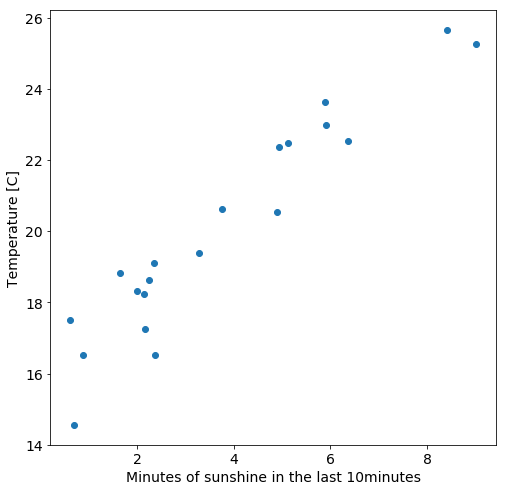

In [3]:
plt.plot(x, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");

In [14]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        y_pred = self.W*X + self.b
        return y_pred
    
    def grad_loss(self, x, y_true):
        # TODO?: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        grad_b = 0
        grad_W = 0

        #calculating the change for each point
        grad_b += - 2 * (y_true - ((self.W*x) + self.b))
        grad_W += - 2 * x * (y_true - ((self.W * x) + self.b))
        
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update, update W and b
        grads = self.grad_loss(x, y)
        
        self.W = self.W - (learning_rate * grads['W'])
        self.b = self.b - (learning_rate * grads['b'])
        
    def loss(self, x, y):
        y_pred = self.predict(x)
        loss = (y - y_pred)**2
        
        return loss

    def accuracy(self, X, y):
        acc = np.empty(len(X))
        
        for value, result in zip(X, y):
            np.append(acc, self.loss(value, result))    
        
        print(acc)
        ols = np.sum(acc)/len(X)

        return ols

Questions:

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between SGD and normal GD?

In [12]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

initial value of W: -0.4054 and b: -0.3975


In [15]:
# Train for one epoch
learning_rate = 0.01
for epoch in range(1,10):
    for i, (x_, y_) in enumerate(zip(x, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(x, temp)
    print("Update: train accuracy: %0.3f"% (train_acc), end=' ')
    print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))

Update: train accuracy: 3.065 value of W: 2.2032 and b: 11.1690
Update: train accuracy: 3.065 value of W: 2.0891 and b: 11.6869
Update: train accuracy: 3.065 value of W: 1.9877 and b: 12.1476
Update: train accuracy: 3.065 value of W: 1.8974 and b: 12.5575
Update: train accuracy: 3.065 value of W: 1.8170 and b: 12.9222
Update: train accuracy: 3.065 value of W: 1.7455 and b: 13.2467
Update: train accuracy: 3.065 value of W: 1.6820 and b: 13.5353
Update: train accuracy: 3.065 value of W: 1.6254 and b: 13.7921
Update: train accuracy: 3.065 value of W: 1.5751 and b: 14.0205


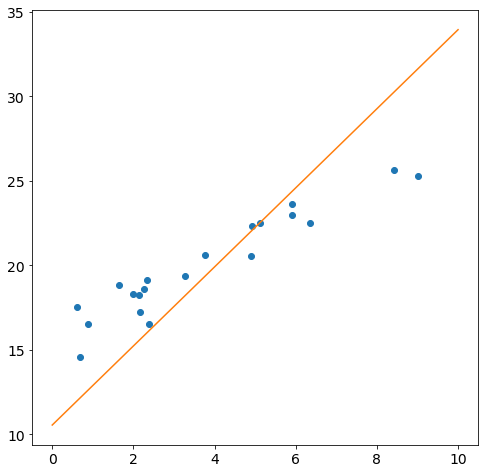

In [7]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr.predict(line));